# **Hand Written Digit Prediction - Classification Analysis**

**Objective**

The objective of this project is to build a classification model that can accurately predict handwritten digits from images.

**Data Source**

The dataset used in this project is the MNIST dataset, which contains images of handwritten digits (0 to 9).

**Import Library**



*   pandas (imported as ps) for data manipulation and analysis.
*   numpy (imported as ny) for numerical operations.

*   matplotlib.pyplot (imported as mt) for data visualization.
*   sklearn.datasets for loading the MNIST dataset.

*   sklearn.model_selection for splitting the dataset into training and testing sets.
*   sklearn.ensemble for building and training a Random Forest model.

*   sklearn.metrics for model evaluation.









In [3]:
import pandas as ps
import numpy as ny
import matplotlib.pyplot as mt

**Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

**Describe Data**

In [25]:
n_samples = len(df.images)
print(f"Number of samples: {n_samples}")

Number of samples: 1797


In [26]:
image_shape = df.images[0].shape
print(f"Image shape: {image_shape}")

Image shape: (8, 8)


In [27]:
data = df.images.reshape((n_samples, -1))

min_pixel_value = data.min()
max_pixel_value = data.max()
print(f"Pixel intensity range: {min_pixel_value} to {max_pixel_value}")

Pixel intensity range: 0.0 to 16.0


In [28]:
target_variable = df.target
print(f"Target variable shape: {target_variable.shape}")

Target variable shape: (1797,)


**Data Visualization**

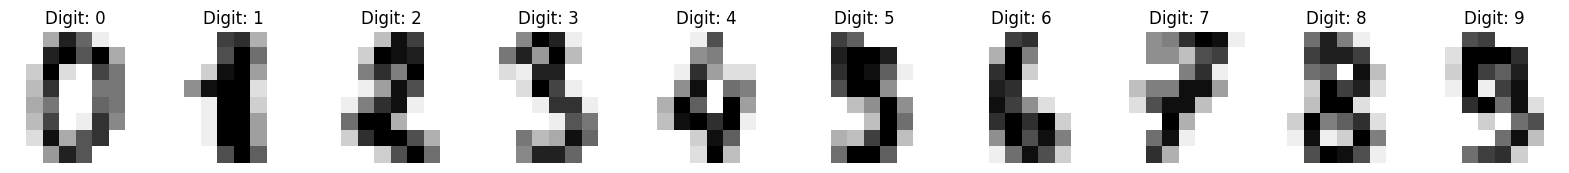

In [29]:
_, axes = mt.subplots(nrows=1, ncols=10, figsize=(20, 6))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=mt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Digit: {label}")

**Data Pre Processing**

In [30]:
# Normalize pixel values to the range [0, 1]:
data = data / 16.0
# After preprocessing, the pixel values in the images are scaled between 0 and 1.

**Define Target Variable (y) and Feature Variables (X)**

In [31]:
X = data  # Feature variables
y = df.target  # Target variable

**Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

**Modeling**

Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Model Evaluation**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
y_pred = rf.predict(X_test)

In [22]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[49  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  1 61  0  0  0  0  0  0  2]
 [ 0  0  0 58  0  0  0  1  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  1 55  0  0  1  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  1  1  1  0  0  0  1 42  0]
 [ 0  0  0  2  0  2  0  1  1 51]]


In [23]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.96      1.00      0.98        54
           2       0.98      0.94      0.96        65
           3       0.95      0.98      0.97        59
           4       0.98      1.00      0.99        59
           5       0.96      0.96      0.96        57
           6       1.00      1.00      1.00        47
           7       0.94      1.00      0.97        47
           8       0.95      0.91      0.93        46
           9       0.96      0.89      0.93        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**Prediction**

In [32]:
y_pred = rf.predict(X_test)

# The variable y_pred now contains the predicted labels for the testing data.

**Explaination**

This project uses the MNIST dataset, which contains images of handwritten digits. The data is preprocessed, split into training and testing sets, and a Random Forest model is trained for classification. Model evaluation metrics such as the confusion matrix and classification report are used to assess the model's performance. Finally, the trained model is used to make predictions on new handwritten digit images.